### Google colab 25GB RAM with GPU accelerator is used to run this notebook

# Reading data and loading model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/My Drive/new_images.zip'

In [1]:
import pandas as pd

train2 = pd.read_pickle('/content/gdrive/My Drive/train2_new')

In [2]:
from tqdm import tqdm 

for i in tqdm(range(len(train2))):
  for j in range(1,5):
    if type(train2['e'+str(j)].iloc[i]) is not str:
      train2['e'+str(j)][i] = train2['e'+str(j)].iloc[i][0]

100%|██████████| 13377/13377 [00:03<00:00, 3407.86it/s]


In [3]:
! pip uninstall keras -y
! pip install segmentation-models

In [4]:
import tensorflow as tf
SM_FRAMEWORK=tf.keras
from segmentation_models import Unet

network = 'resnet34'
model = Unet(network,input_shape = (256, 1600, 3),classes=4,activation='sigmoid',encoder_freeze=True)

Segmentation Models: using `tf.keras` framework.


In [5]:
model.load_weights('/content/gdrive/My Drive/Model-Unet-weights-v2.hdf5')

# Function 1

In [6]:
#returns mask for input image and also plots the predicted mask
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

def function_1(name):
  palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

  name = 'images/'+name 
  img = cv2.imread(name)/255  
  img = cv2.resize(img,(1600,256))
  img = np.expand_dims(img,0)

  pred = model.predict(img)

  plt.figure(figsize=(20,20))
  mask = pred[0]
  img = img[0]
  img = np.asarray(img)
  mask = np.asarray(mask)
  mask[mask>0.5]=1
  mask[mask<=0.5]=0
  mask = mask.astype(np.uint8)
  for ch in range(4):
    contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for o in range(0, len(contours)):
      cv2.polylines(img, contours[o], True, palet[ch], 2)
  plt.imshow(img)
  title_ = "Defect "
  if np.sum(mask[:,:,0])>0:
    title_ = title_+"1 "
  if np.sum(mask[:,:,1])>0:
    title_ = title_+"2 "
  if np.sum(mask[:,:,2])>0:
    title_ = title_+"3 "
  if np.sum(mask[:,:,3])>0:
    title_ = title_+"4 "
  plt.title(title_)
  
  return mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 2.718 seconds


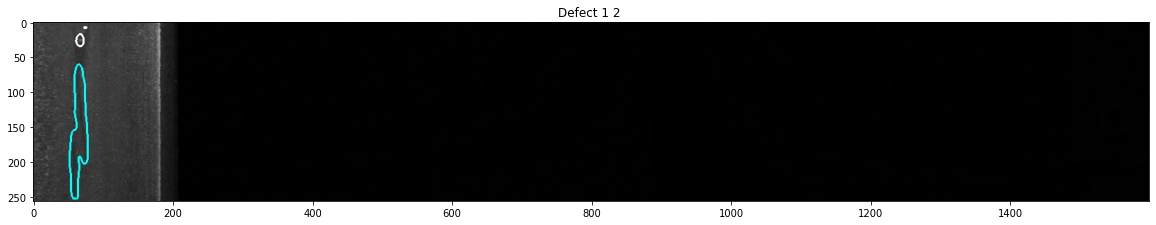

In [7]:
start = time.time()

y = function_1('lrudfbc97ac61.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.123 seconds


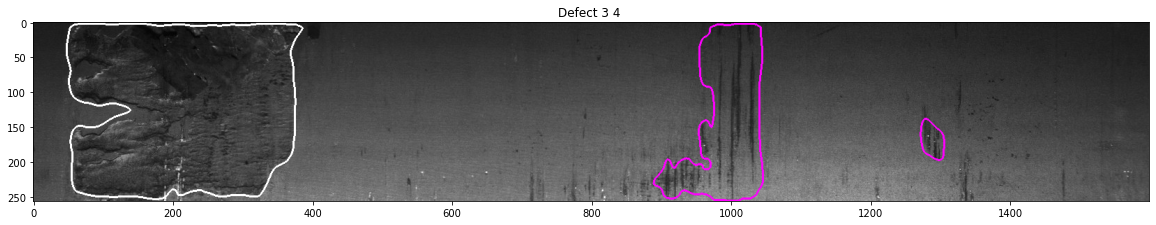

In [8]:
start = time.time()

y = function_1('07cbfd1f8.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.115 seconds


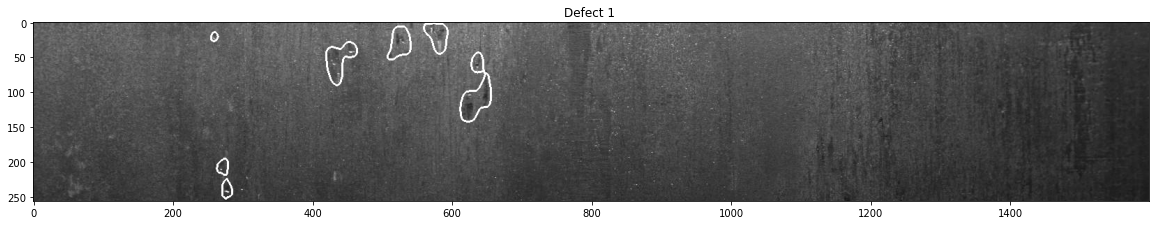

In [9]:
start = time.time()

y = function_1('ud04e23e414.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.123 seconds


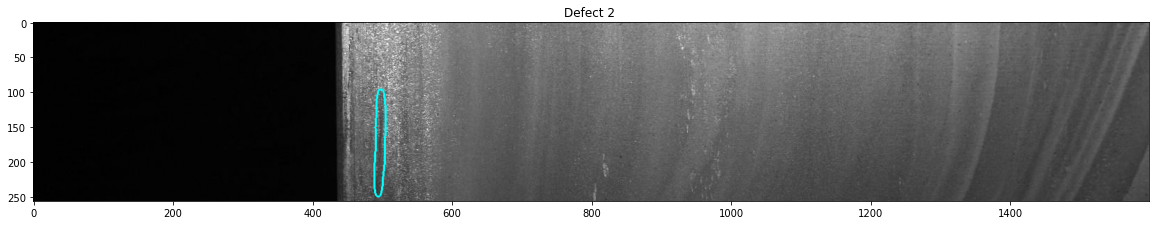

In [10]:
start = time.time()

y = function_1('ud060964105.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.121 seconds


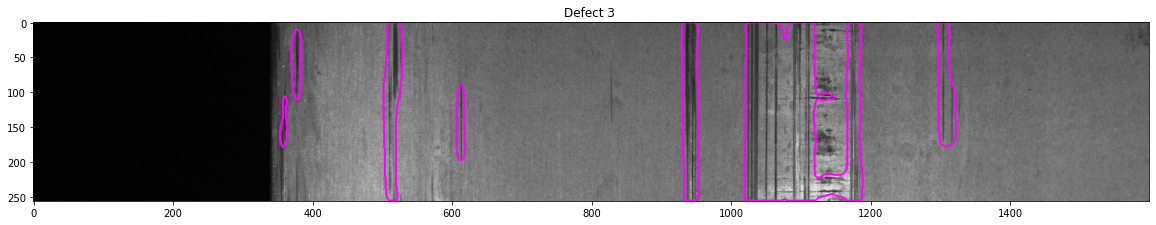

In [11]:
start = time.time()

y = function_1('b46ecc387.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.119 seconds


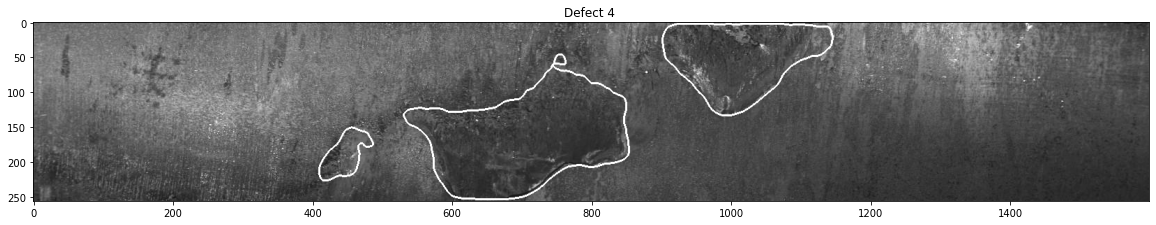

In [12]:
start = time.time()

y = function_1('ud000f6bf48.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

### Observation: The model is able to predict all types of defects

# Function 2

In [13]:
#returns mask for input image and also plots the real mask vs predicted mask
def masks(encoded_pixels):
    counts=[]
    mask=np.zeros((256*1600), dtype=np.int8) 
    pre_mask=np.asarray([int(point) for point in encoded_pixels.split()])
    for index,count in enumerate(pre_mask):
        if(index%2!=0):
            counts.append(count)
    i=0
    for index,pixel in enumerate(pre_mask):
        if(index%2==0):
            if(i==len(counts)):
                break
            mask[pixel:pixel+counts[i]]=1
            i+=1
    mask=np.reshape(mask,(1600,256))
    mask=cv2.resize(mask,(256,1600)).T
    return mask

def function_2(name):
  palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

  name1 = 'images/'+name 
  img = cv2.imread(name1)/255  
  img = cv2.resize(img,(1600,256))
  img = np.expand_dims(img,0)

  pred = model.predict(img)

  plt.figure(figsize=(20,20))
  idx=train2[train2.ImageId==name].index[0]
  mask = np.empty((256,1600,4),dtype=np.int8)
  for i in range(4):
      mask[:,:,i] = masks(train2['e'+str(i+1)].iloc[idx])
  img = img[0]
  img = np.asarray(img)
  mask = np.asarray(mask)
  mask = mask.astype(np.uint8)
  for ch in range(4):
    contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for o in range(0, len(contours)):
      cv2.polylines(img, contours[o], True, palet[ch], 2)
  plt.imshow(img)

  title_ = "Real mask: Defect "
  if np.sum(mask[:,:,0])>0:
    title_ = title_+"1 "
  if np.sum(mask[:,:,1])>0:
    title_ = title_+"2 "
  if np.sum(mask[:,:,2])>0:
    title_ = title_+"3 "
  if np.sum(mask[:,:,3])>0:
    title_ = title_+"4 "
  plt.title(title_)


  plt.figure(figsize=(20,20))
  name1 = 'images/'+name 
  img = cv2.imread(name1)/255  
  img = cv2.resize(img,(1600,256))
  img = np.expand_dims(img,0)
  mask = pred[0]
  img = img[0]
  img = np.asarray(img)
  mask = np.asarray(mask)
  mask[mask>0.5]=1
  mask[mask<=0.5]=0
  mask = mask.astype(np.uint8)
  for ch in range(4):
    contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for o in range(0, len(contours)):
      cv2.polylines(img, contours[o], True, palet[ch], 2)
  plt.imshow(img)
  title_ = "Prediction mask: Defect "
  if np.sum(mask[:,:,0])>0:
    title_ = title_+"1 "
  if np.sum(mask[:,:,1])>0:
    title_ = title_+"2 "
  if np.sum(mask[:,:,2])>0:
    title_ = title_+"3 "
  if np.sum(mask[:,:,3])>0:
    title_ = title_+"4 "
  plt.title(title_)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.165 seconds


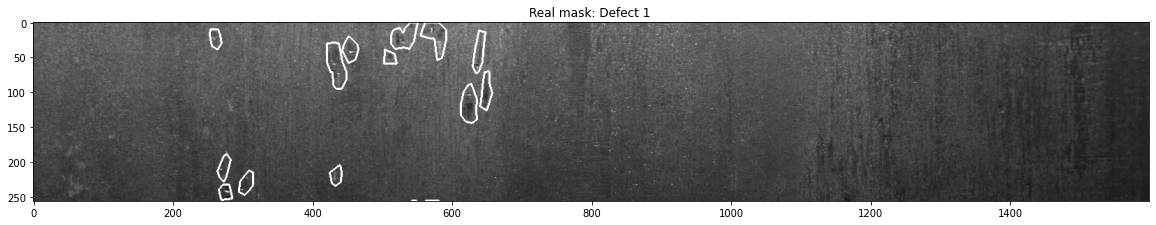

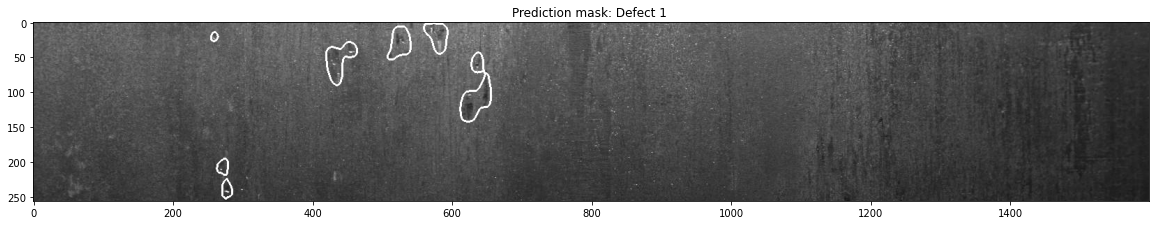

In [14]:
start = time.time()

y = function_2('ud04e23e414.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.273 seconds


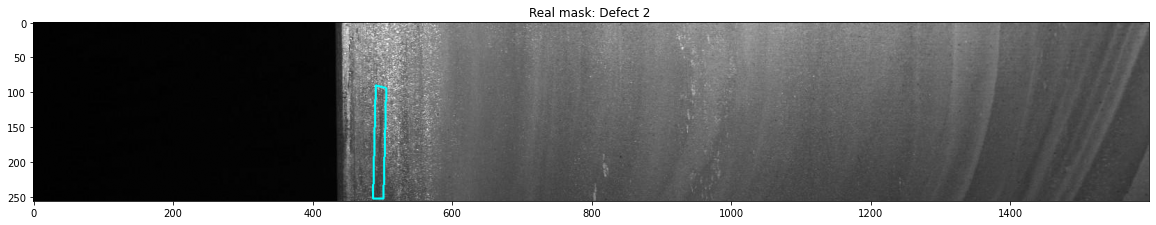

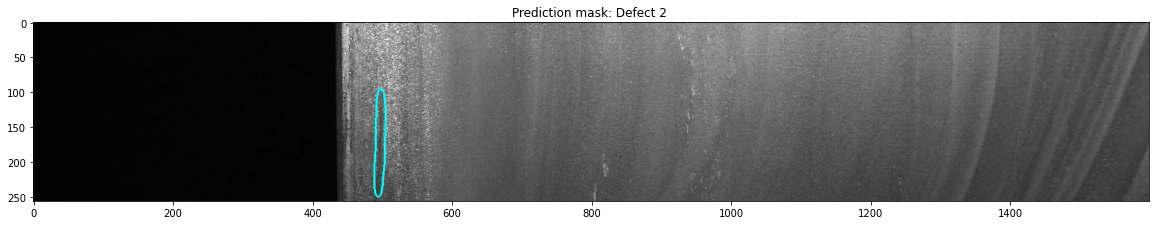

In [15]:
start = time.time()

y = function_2('ud060964105.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.166 seconds


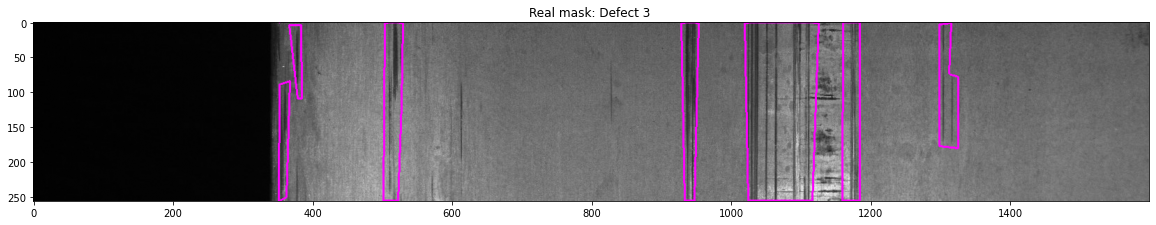

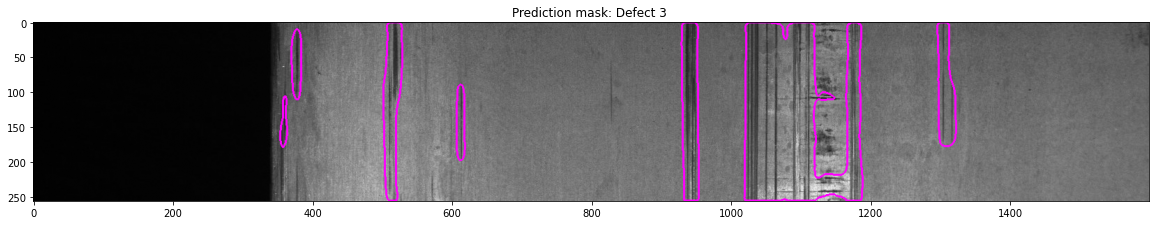

In [16]:
start=time.time()

function_2('b46ecc387.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.162 seconds


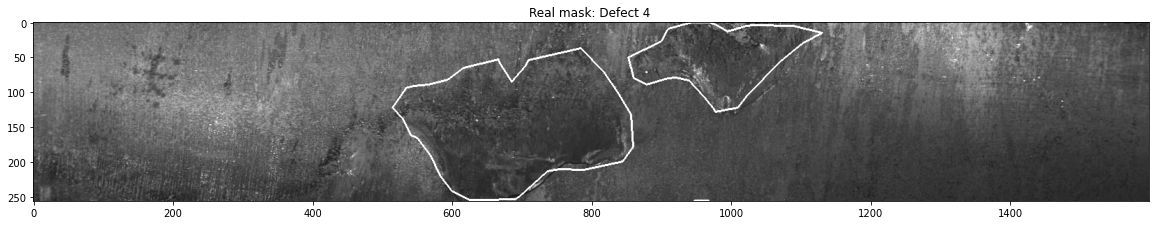

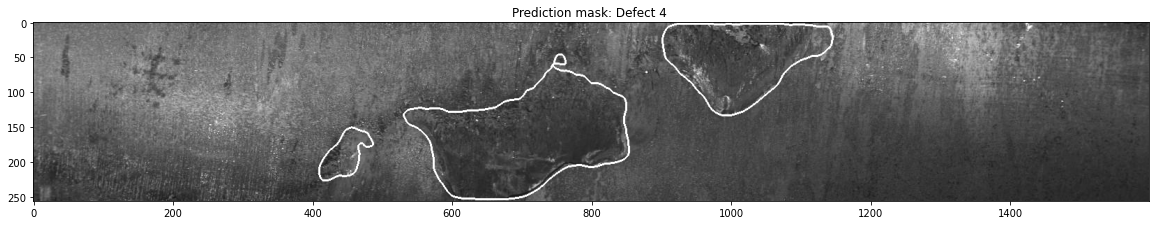

In [17]:
start = time.time()

y = function_2('ud000f6bf48.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.169 seconds


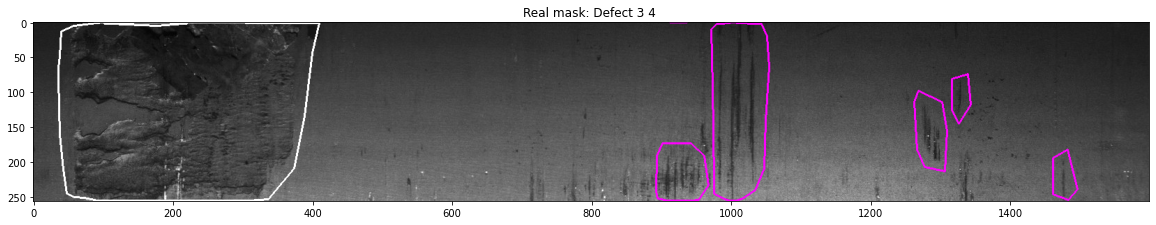

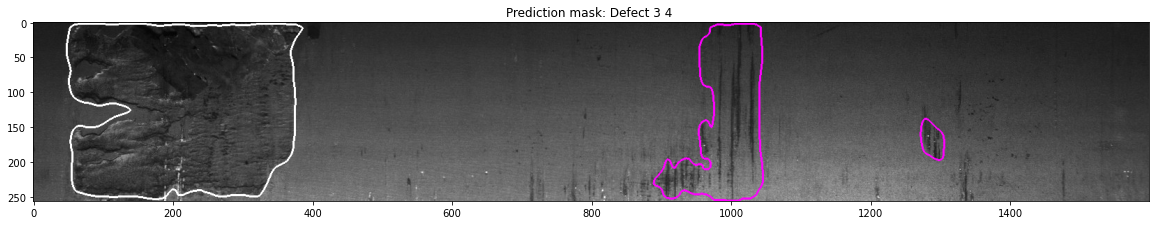

In [18]:
start = time.time()

y = function_2('07cbfd1f8.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken to predict: 0.175 seconds


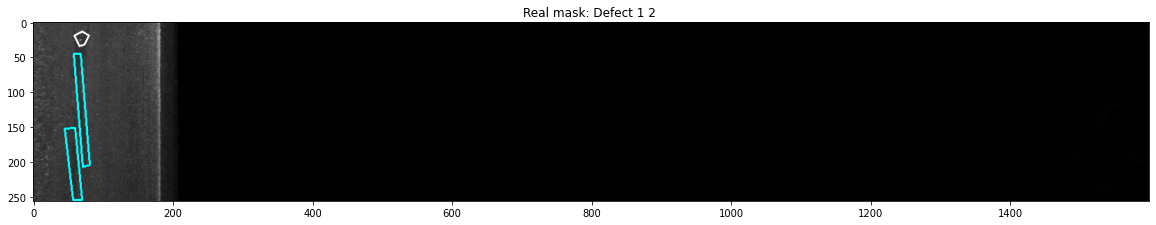

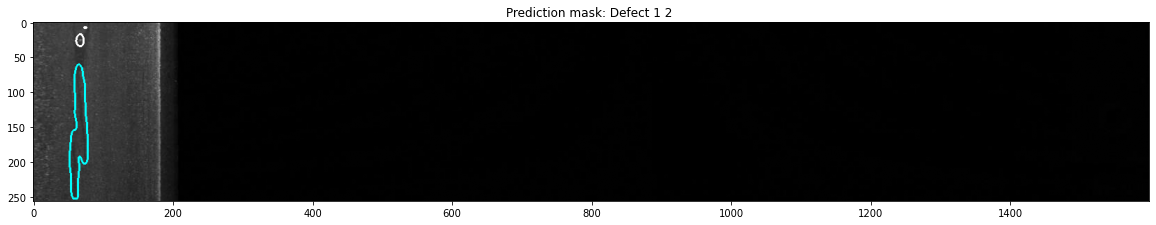

In [19]:
start = time.time()

y = function_2('lrudfbc97ac61.jpg')

x = time.time() - start
print('Time taken to predict:',round(x,3),'seconds')

### Observation: The prediction masks are very similar to original masks